# W7 - October 4 - NumPy, SciPy and Matplotlib: Other operations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Types of Plots

We have seen how to make simple plots in class, and have experimented with the scatter plot in HW3. Let's look at some others.

**Bar plots**

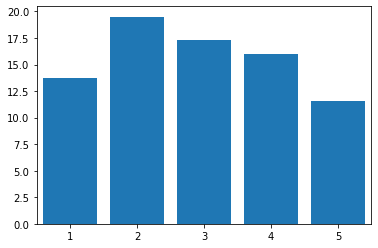

In [2]:
# Make data:
np.random.seed(42)
x = np.arange(1, 6)
height = np.random.uniform(10, 20, len(x))

# Plot
plt.bar(x, height)
plt.xlim(0.5, 5.5);

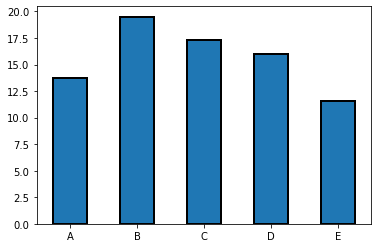

In [3]:
# Customize plot
plt.bar(x, height, width=0.5, edgecolor="black", linewidth=2)
plt.xlim(0.5, 5.5);
plt.xticks(np.arange(1, 6), labels = ["A", "B", "C", "D", "E"]);

**Histogram**

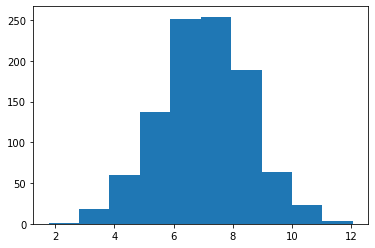

In [4]:
# Make data
x = 7 + np.random.normal(0, 1.5, 1000)

# Plot:
counts, centers, fig = plt.hist(x, bins=10)
# plt.hist() also returns the counts (frequency) and bin centers for your data

In [5]:
counts, centers

(array([  1.,  18.,  60., 137., 251., 254., 189.,  63.,  23.,   4.]),
 array([ 1.77878676,  2.80675252,  3.83471828,  4.86268404,  5.89064981,
         6.91861557,  7.94658133,  8.97454709, 10.00251286, 11.03047862,
        12.05844438]))

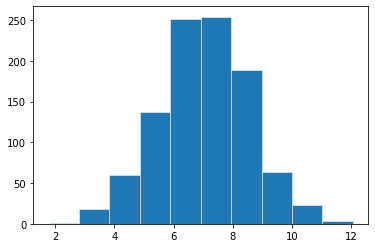

In [6]:
# Customize plot
plt.hist(x, bins=10, linewidth=0.5, edgecolor="white");

**Step plot**

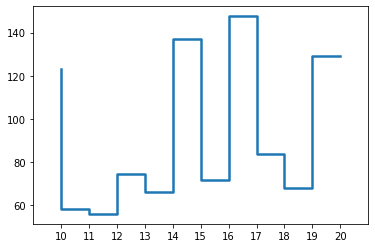

In [7]:
# Make data
x = 10 + np.arange(11)
y = np.random.uniform(50, 150, len(x))

# Plot
plt.step(x, y, linewidth=2.5)

plt.xlim(9, 21)
plt.xticks(np.arange(10, 21));

**Boxplot**

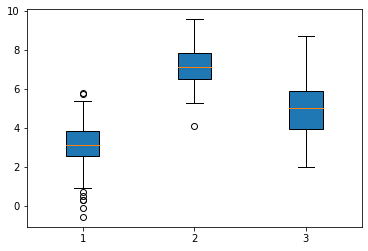

In [8]:
# Make data
X = np.random.normal(loc=(3, 7, 5), scale=(1.25, 1.00, 1.5), size=(100, 3))

# Plot
plt.boxplot(X, patch_artist=True);  # patch_artist=False draws 2D lines

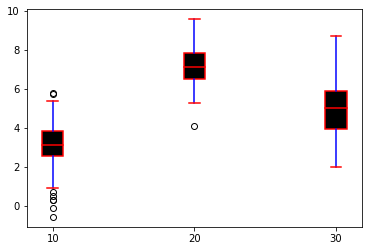

In [9]:
# Customize plot
plt.boxplot(X, positions=[10, 20, 30], widths=1.5, patch_artist=True,
            medianprops={"color": "red", "linewidth": 1.5},
            boxprops={"facecolor": "black", "edgecolor": "red", "linewidth": 1.5},
            whiskerprops={"color": "blue", "linewidth": 1.5},
            capprops={"color": "red", "linewidth": 1.5});

**Error bars**

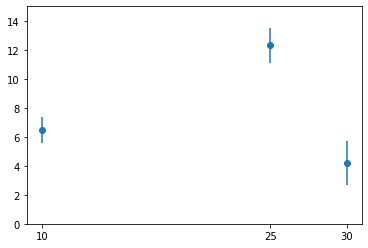

In [10]:
# Make data:
x = [10, 25, 30]
y = [6.5, 12.3, 4.2]
yerr = [0.9, 1.2, 1.5]

# Plot:
plt.errorbar(x, y, yerr, fmt='o')
plt.xticks(x)
plt.ylim(0, 15);

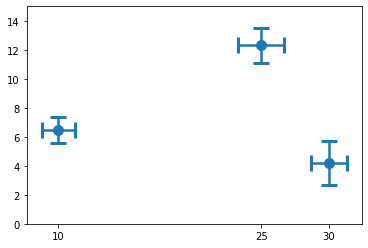

In [11]:
# Customize plot and add xerr
xerr = [1.2, 1.7, 1.3]

# Plot:
plt.errorbar(x, y, yerr, xerr, fmt='o',  markersize=10, linewidth=2.5, capsize=8, capthick=3)
plt.xticks(x)
plt.ylim(0, 15);

**Fill-between plot**

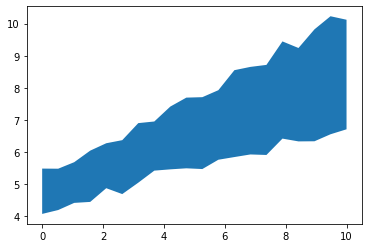

In [12]:
# Make data
x = np.linspace(0, 10, 20)
y1 = 5 + 0.5*x + np.random.uniform(0.0, 0.5, len(x))  # Top curve
y2 = 4 + 0.25*x + np.random.uniform(0.0, 0.5, len(x))  # Bottom curve

# Plot
plt.fill_between(x, y1, y2);

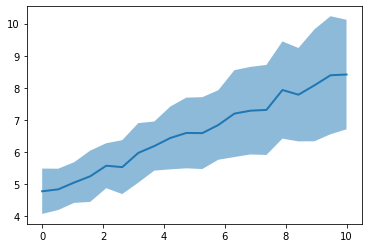

In [13]:
# Customize plot and add centerline
plt.fill_between(x, y1, y2,
                 alpha=.5)  # Transparency

plt.plot(x, (y1 + y2)/2, linewidth=2);  # Centerline

## Plotting 2D arrays

**`imshow`**

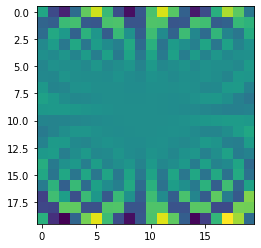

In [14]:
# Make data
x, y = np.linspace(-5, 5, 20), np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = 5*(X/2 + X**2 + Y**3) * np.sin(2*X * Y)

# Plot
plt.imshow(Z);

**`pcolormesh`** is more flexible, in that the x and y vectors can be skewed (i.e., they don't need to be equally spaced.

In [15]:
# Make skewed data
x = np.linspace(-5, 5, 20)
y = np.concatenate((np.linspace(-5, -1.5, 6), np.linspace(-1, 1, 8), np.linspace(1.5, 5, 6)))
y

array([-5.        , -4.3       , -3.6       , -2.9       , -2.2       ,
       -1.5       , -1.        , -0.71428571, -0.42857143, -0.14285714,
        0.14285714,  0.42857143,  0.71428571,  1.        ,  1.5       ,
        2.2       ,  2.9       ,  3.6       ,  4.3       ,  5.        ])

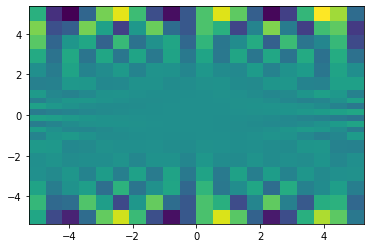

In [16]:
X, Y = np.meshgrid(x, y)
Z = 5*(X/2 + X**2 + Y**3) * np.sin(2*X * Y)

# Plot
plt.pcolormesh(X, Y, Z);

**`contour` and `contourf`**

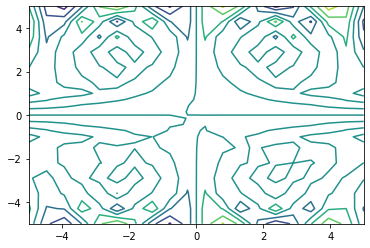

In [17]:
plt.contour(X, Y, Z);

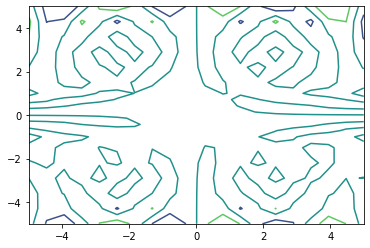

In [18]:
levels = np.linspace(np.min(Z), np.max(Z), 5)
plt.contour(X, Y, Z, levels=levels);

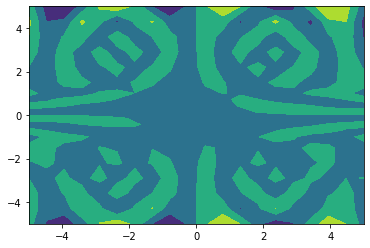

In [19]:
plt.contourf(X, Y, Z, levels=levels);

## Images

### Opening and displaying images

In [20]:
import skimage.io as io
cat = io.imread('cat.jpg')
type(cat), cat.shape, cat.dtype

(numpy.ndarray, (810, 1080, 3), dtype('uint8'))

Color images are a 3D array `[row, col, channel]`: 2 dimensions for X and Y pixels, and a 3rd dimension with length N, for the N color channels (e.g., Red, Blue Green, for an RGB image).

`dtype` is uint8 for 8-bit images (0-255).

`imshow`, as the name implies, can be used to display these images.

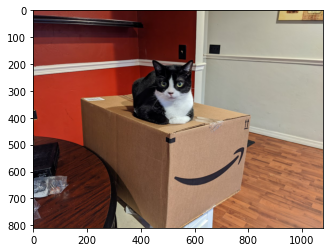

In [21]:
plt.imshow(cat);

Many images we use in engineering (e.g., from microscopes) are grayscale.

In [22]:
sem = io.imread('SEM.tif')
type(sem), sem.shape, sem.dtype

TiffPage 1: ByteCounts tag is missing
TiffPage 1: incorrect StripOffsets count


(numpy.ndarray, (877, 1024), dtype('uint8'))

Grayscale images are a 2D array `[row, col]`: There is only a single "color": Each value in the array represents the intensity of the image, from black (0) to white (255).

Remember, `dtype` is uint8 for 8-bit images (0-255).

When using `imshow`, we have to also use `cmap` to tell `matplotlib` that it is a grayscale image. Otherwise, it uses the yellow-purple heatmap as we saw in the examples above.

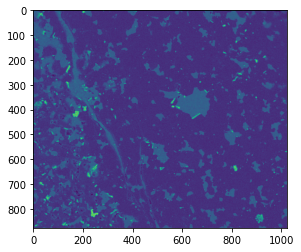

In [23]:
plt.imshow(sem);

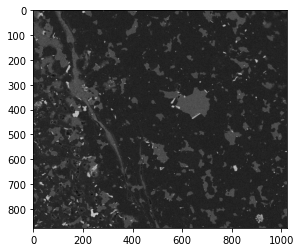

In [24]:
plt.imshow(sem, cmap=plt.cm.gray);

An RGB image is basically just 3 “grayscale” images stacked on top of each other (hence the length of 3 for the 3rd dimension of the array). Each layer corresponds to the intensity of a particular color channel.

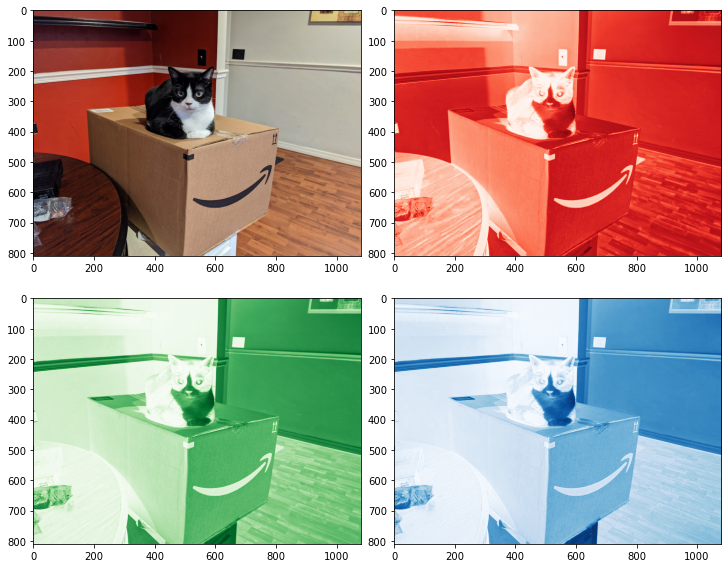

In [25]:
# Create 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout="constrained")

# Plot color channels in subplots 1-3
colors = ["Reds", "Greens", "Blues"]
for i, (ax, color) in enumerate(zip(axs.ravel()[1:], colors)):
    ax.imshow(cat[:,:,i], cmap=color)

# Plot original image top left (subplot 0)
axs[0,0].imshow(cat);

### Manipulating images

Since we now know that images are basically just NumPy arrays, we can manipulate them using `numpy` or `scipy`.

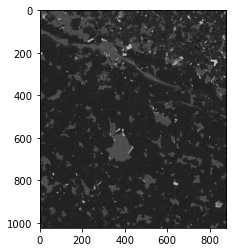

In [26]:
plt.imshow(sem.T, cmap=plt.cm.gray);

**Slicing**

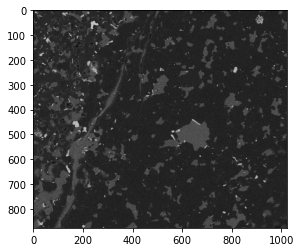

In [27]:
# Mirror the image by slicing
plt.imshow(sem[::-1], cmap=plt.cm.gray);

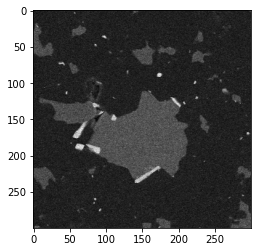

In [28]:
# Plot a part of the image
plt.imshow(sem[200:500, 500:800], cmap=plt.cm.gray);

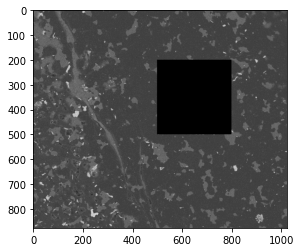

In [29]:
# Black-out a part of the image
sem_mod = sem.copy()

sem_mod[200:500, 500:800] = 0

plt.imshow(sem_mod, cmap=plt.cm.gray);

**Masks**

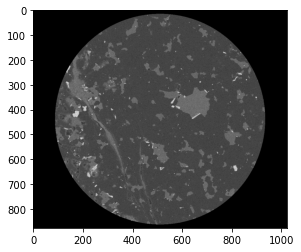

In [30]:
sem_mod = sem.copy()

# Creating a circular mask
lx, ly = sem.shape
X, Y = np.ogrid[0:lx, 0:ly]  # Like a combination of np.linspace and np.meshgrid
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 5  # Circle equation, with radius sqrt(lx * ly/5)

sem_mod[mask] = 0
plt.imshow(sem_mod, cmap=plt.cm.gray);

### Using `scipy`

In [31]:
from scipy import ndimage

**Gaussian blur**

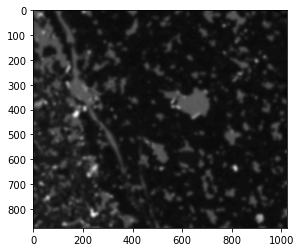

In [32]:
sem_mod = sem.copy()

blurred_sem = ndimage.gaussian_filter(sem_mod, sigma=5)
plt.imshow(blurred_sem, cmap=plt.cm.gray);

**Segmentation**

Total Number of pixels = 90000


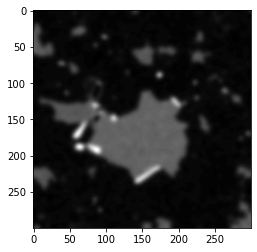

In [33]:
sem_mod = sem.copy()
sem_zoom = sem_mod[200:500, 500:800]
n_pixels = np.prod(sem_zoom.shape)
print(f"Total Number of pixels = {n_pixels}")

blurred = ndimage.gaussian_filter(sem_zoom, sigma=3)
plt.imshow(blurred, cmap=plt.cm.gray);

Light area = 24.27 %
Dark area = 75.73 %


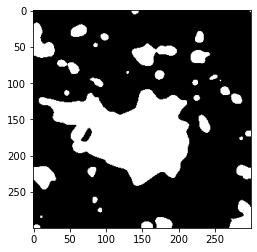

In [34]:
mask = blurred > blurred.mean()
inv_mask = blurred <= blurred.mean()
ratio_mask = mask.sum() / n_pixels
ratio_inv_mask = inv_mask.sum() / n_pixels
print(f"Light area = {ratio_mask*100:.2f} %")
print(f"Dark area = {ratio_inv_mask*100:.2f} %")

blurred[mask] = 255
blurred[inv_mask] = 0
plt.imshow(blurred, cmap=plt.cm.gray);

**Sobols' Edge detection**

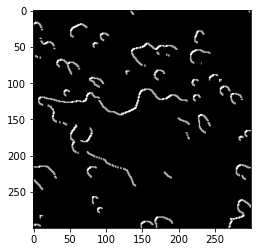

In [35]:
sx = ndimage.sobel(blurred, axis=0, mode='constant')
sy = ndimage.sobel(blurred, axis=1, mode='constant')
sob = np.hypot(sx, sy)
plt.imshow(sob, cmap=plt.cm.gray);